<a href="https://colab.research.google.com/github/acastellanos-ie/NLP-SAMBD-EN-2021/blob/main/text_preprocessing/bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [1]:
repository_name = "NLP-SAMBD-EN-2021"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [2]:
! git clone $repository_url

Cloning into 'NLP-SAMBD-EN-2021'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 57 (delta 19), reused 48 (delta 15), pack-reused 0
Unpacking objects: 100% (57/57), done.


Install the requirements (be aware that it could take a while)

In [3]:
! pip install -Uqqr $repository_name/requirements.txt

     |████████████████████████████████| 12.0 MB 1.3 MB/s 
     |████████████████████████████████| 3.4 MB 6.2 MB/s 
     |████████████████████████████████| 1.5 MB 43.8 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 432 kB 54.3 MB/s 
     |████████████████████████████████| 126 kB 65.1 MB/s 
     |████████████████████████████████| 10.4 MB 64.4 MB/s 
     |████████████████████████████████| 10.5 MB 44.1 MB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 631 kB 50.5 MB/s 
     |████████████████████████████████| 385 kB 48.1 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:42tcmalloc: large alloc 1147494400 bytes == 0x563e381bc000 @  0x7f8f2f45e615 0x563dfe05b4cc 0x563dfe13b47a 0x563dfe05e2ed 0x563dfe14fe1d 0x563dfe0d1e99 0x563dfe0cc9ee 0x563dfe05fbda 0x563dfe0d1d00 0x563dfe0cc9ee 0x563dfe05fbda 0x563dfe0ce737 0x563dfe150c66 0x563dfe0cddaf 0x563dfe150c66 0x563dfe0

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

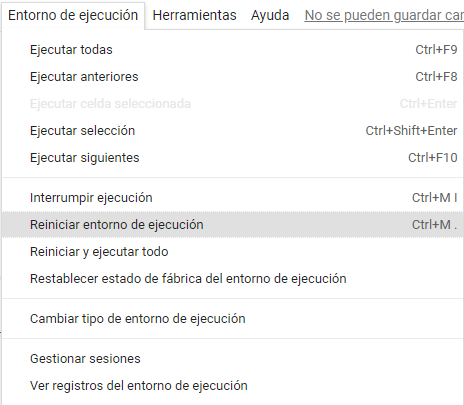

# Bag-of-words

In [4]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

The `nltk` library includes several corpus for experimentation. In this markdown we are going to make use of the corpus including the set of Shakespeare's plays.

In the following cell, I will load the corpus and create a dataframe with the name of the book and the textual content.

In [6]:
# Download the Shakespeare Dataset
nltk.download('shakespeare')

# Loadd the books and their content
shakespeare_df = pd.DataFrame(columns=["book", "words"])

# Print a sample of the books
for ii, book in enumerate(nltk.corpus.shakespeare.fileids()):
    shakespeare_df.loc[ii] = (book, " ".join(nltk.corpus.shakespeare.words(book)))
    
shakespeare_df

[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.


,book,words
0,a_and_c.xml,The Tragedy of Antony and Cleopatra Dramatis P...
1,dream.xml,A Midsummer Night ' s Dream Dramatis Personae ...
2,hamlet.xml,"The Tragedy of Hamlet , Prince of Denmark Dram..."
3,j_caesar.xml,The Tragedy of Julius Caesar Dramatis Personae...
4,macbeth.xml,The Tragedy of Macbeth Dramatis Personae DUNCA...
5,merchant.xml,The Merchant of Venice Dramatis Personae The D...
6,othello.xml,"The Tragedy of Othello , the Moor of Venice Dr..."
7,r_and_j.xml,The Tragedy of Romeo and Juliet Text placed in...


While this representation can be useful for humans, it is of no use if you want to use these data for an NLP system.

As we discussed in class, we need to create the document-term matrix which will be the input for any NLP system we need to create on top of it. In the document term matrix we have a row for each one of the different documents (the Shakespeare's plays) and a column for each one of the words in the dataset. At each cell, you will find the weight of the word in the document (for example, how many times does the word appear in the document).

In class we presented several weighting approaches, let's see how we can create them.

### Binary Weighting

Let's start with the simplest one: The Binary weighting. Binary weighting only defines if a word appears (1) or does not appear (0) in a document

In [29]:
binary_weighting = CountVectorizer(binary=True)
binary_shakespeare = binary_weighting.fit_transform(shakespeare_df.words)
binary_dt_matrix = pd.DataFrame(binary_shakespeare.A, columns=binary_weighting.get_feature_names_out())
binary_dt_matrix

,1992,1996,1998,1999,abandon,abate,abatements,abbey,abhor,abhorred,abhorring,abhors,abide,abides,abilities,ability,abject,abjects,abjure,able,abler,aboard,abode,abominably,abominations,abound,about,above,abraham,abram,abridged,abridgement,abroach,abroad,absence,absent,absolute,absolved,absolver,abstinence,...,year,yearns,years,yell,yellow,yeoman,yerk,yes,yesterday,yesterdays,yesternight,yesty,yet,yew,yield,yielded,yielders,yielding,yields,yoke,yoked,yon,yond,yonder,yorick,you,young,younger,youngest,younker,your,yours,yourself,yourselves,youth,youthful,youths,zeal,zone,zounds
0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,...,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0
6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,...,1,0,1,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1
7,1,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,...,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1


Let's inspect the most and least important terms related to the document 6 (Othello)

In [28]:
document = 6
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(binary_dt_matrix.iloc[:, np.argsort(binary_dt_matrix.loc[document])[::-1]].iloc[document][:25])
print()

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(binary_dt_matrix.iloc[:, np.argsort(binary_dt_matrix.loc[document])[::-1]].iloc[document][-25:])



25 most important terms for document othello.xml
zounds         1
practiser      1
potent         1
potential      1
determined     1
determine      1
potting        1
pottle         1
pour           1
determinate    1
poverty        1
destruction    1
power          1
powerful       1
powers         1
pox            1
practise       1
potations      1
devesting      1
device         1
devotion       1
portents       1
dew            1
devout         1
position       1
Name: 6, dtype: int64

25 least important terms for document othello.xml
outrage        0
origin         0
orient         0
organs         0
organ          0
ore            0
ordnance       0
osier          0
osric          0
ossa           0
ostent         0
ostentation    0
ostents        0
ought          0
ounce          0
ourself        0
ousel          0
outbrave       0
outbreak       0
outcries       0
outcry         0
outface        0
outlawry       0
outlives       0
1992           0
Name: 6, dtype: int64


As you can see, the representation is not very useful as it is. By only telling us if a word appears or not in a document is not giving us a lot of information. **Can you think on a situation where this binary weighting can be sufficient?**


### Term Frequency Weighting

The next thing to know will be whether the word appears only once or several times.

In [27]:
tf_weighting = CountVectorizer()
tf_shakespeare = tf_weighting.fit_transform(shakespeare_df.words)
tf_dt_matrix = pd.DataFrame(tf_shakespeare.A, columns=tf_weighting.get_feature_names_out())
tf_dt_matrix

,1992,1996,1998,1999,abandon,abate,abatements,abbey,abhor,abhorred,abhorring,abhors,abide,abides,abilities,ability,abject,abjects,abjure,able,abler,aboard,abode,abominably,abominations,abound,about,above,abraham,abram,abridged,abridgement,abroach,abroad,absence,absent,absolute,absolved,absolver,abstinence,...,year,yearns,years,yell,yellow,yeoman,yerk,yes,yesterday,yesterdays,yesternight,yesty,yet,yew,yield,yielded,yielders,yielding,yields,yoke,yoked,yon,yond,yonder,yorick,you,young,younger,youngest,younker,your,yours,yourself,yourselves,youth,youthful,youths,zeal,zone,zounds
0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,0,2,1,0,1,0,7,3,0,0,0,0,0,2,2,0,6,0,0,0,...,1,0,2,0,0,0,0,6,1,0,0,0,45,0,6,3,0,1,0,0,0,1,2,2,0,367,3,1,0,0,140,11,15,1,5,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,0,1,7,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,4,0,0,2,0,0,0,0,26,0,3,0,1,1,1,2,0,0,0,4,0,274,7,0,0,0,123,4,3,3,7,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,3,0,1,0,0,18,4,0,0,0,1,0,1,0,1,2,0,0,1,...,5,0,3,0,0,1,0,5,1,0,1,1,42,0,2,0,0,1,0,0,0,1,1,2,2,548,17,1,0,0,242,6,15,1,16,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,18,5,0,0,1,0,0,2,1,1,0,0,0,0,...,1,1,4,0,0,0,0,6,2,0,1,0,42,0,3,1,0,0,1,2,1,1,2,3,0,392,10,0,0,0,130,10,12,6,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,12,3,0,0,0,0,0,2,2,1,3,0,0,0,...,0,0,0,1,1,0,0,2,1,1,0,1,57,1,4,0,0,0,0,1,0,0,0,0,0,207,14,0,0,0,121,3,2,3,1,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1,0,0,2,0,1,1,0,0,0,9,6,0,2,1,0,0,3,3,2,0,0,0,0,...,3,0,3,0,0,0,0,8,1,0,0,0,35,0,4,0,0,0,0,1,0,2,0,1,0,444,24,0,0,1,175,16,4,0,8,1,0,1,0,0
6,0,0,0,0,1,0,0,0,3,0,0,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,13,4,0,0,0,0,0,2,3,2,2,0,0,0,...,3,0,7,1,0,0,1,8,2,0,0,0,69,0,1,0,0,0,0,0,1,0,2,1,0,486,10,0,0,0,205,6,16,0,5,0,0,0,0,3
7,1,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,11,14,7,0,0,0,1,3,0,0,0,1,1,0,...,3,0,12,0,1,0,0,2,0,0,1,0,47,2,0,0,0,1,0,1,0,3,3,6,0,293,24,2,1,0,103,4,5,0,6,3,0,0,0,2


Ok, now we have the words weighted according to how many times they appear in the document. 

Let's check now the most and least important words in Othello

In [26]:
document = 6
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_dt_matrix.iloc[:, np.argsort(tf_dt_matrix.loc[document])[::-1]].iloc[document][:25])
print()

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_dt_matrix.iloc[:, np.argsort(tf_dt_matrix.loc[document])[::-1]].iloc[document][-25:])

25 most important terms for document othello.xml
and          794
the          761
to           629
you          486
of           475
my           416
that         395
iago         360
in           341
othello      336
not          318
it           317
is           309
me           281
cassio       254
he           246
for          240
desdemona    230
be           226
with         221
but          221
this         220
do           219
her          215
have         207
Name: 6, dtype: int64

25 least important terms for document othello.xml
outrage        0
origin         0
orient         0
organs         0
organ          0
ore            0
ordnance       0
osier          0
osric          0
ossa           0
ostent         0
ostentation    0
ostents        0
ought          0
ounce          0
ourself        0
ousel          0
outbrave       0
outbreak       0
outcries       0
outcry         0
outface        0
outlawry       0
outlives       0
1992           0
Name: 6, dtype: int64


**What problem do you see with the most important words? Are they really representative?**



### Term Frequency / Inverse Document Frequency Weighting

Let's check now how to create the TF-IDF weighting to see if we can improve this representation

In [25]:
tf_idf_weighting = TfidfVectorizer()
tf_idf_shakespeare = tf_idf_weighting.fit_transform(shakespeare_df.words)
tf_idf_dt_matrix = pd.DataFrame(tf_idf_shakespeare.A, columns=tf_idf_weighting.get_feature_names_out())
tf_idf_dt_matrix

,1992,1996,1998,1999,abandon,abate,abatements,abbey,abhor,abhorred,abhorring,abhors,abide,abides,abilities,ability,abject,abjects,abjure,able,abler,aboard,abode,abominably,abominations,abound,about,above,abraham,abram,abridged,abridgement,abroach,abroad,absence,absent,absolute,absolved,absolver,abstinence,...,year,yearns,years,yell,yellow,yeoman,yerk,yes,yesterday,yesterdays,yesternight,yesty,yet,yew,yield,yielded,yielders,yielding,yields,yoke,yoked,yon,yond,yonder,yorick,you,young,younger,youngest,younker,your,yours,yourself,yourselves,youth,youthful,youths,zeal,zone,zounds
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001116,0.000000,0.001253,0.001116,0.000000,0.000000,0.000000,0.00000,0.000000,0.000627,0.00000,0.001253,0.000807,0.000000,0.001116,0.000000,0.003120,0.001495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000997,0.001116,0.000000,0.004247,0.000000,0.000000,0.000000,...,0.000558,0.00000,0.000997,0.000000,0.000000,0.000000,0.000000,0.002675,0.000558,0.000000,0.000000,0.000000,0.020059,0.000000,0.002990,0.002806,0.000000,0.000708,0.000000,0.000000,0.000000,0.000627,0.001253,0.000997,0.000000,0.163596,0.001337,0.000807,0.000000,0.000000,0.062407,0.004903,0.006686,0.000627,0.002491,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.001132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002004,0.000000,0.000000,0.000000,0.000000,0.00000,0.001496,0.002004,0.00000,0.000000,0.000000,0.000000,0.000000,0.001291,0.004990,0.000000,0.000000,0.000000,0.000000,0.001496,0.000000,0.000000,0.000892,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000797,0.000000,0.005163,0.000000,0.000000,0.001426,0.000000,0.000000,0.000000,0.000000,0.018533,0.000000,0.002390,0.000000,0.001785,0.001132,0.001496,0.002004,0.000000,0.000000,0.000000,0.003187,0.000000,0.195305,0.004990,0.000000,0.000000,0.000000,0.087673,0.002851,0.002138,0.003005,0.005577,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000551,0.000869,0.000000,0.000000,0.000628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000728,0.000000,0.00000,0.000000,0.000488,0.00000,0.001463,0.000000,0.000869,0.000000,0.000000,0.006247,0.001552,0.000000,0.000000,0.000000,0.000728,0.000000,0.000388,0.000000,0.000488,0.001102,0.000000,0.000000,0.000869,...,0.002171,0.00000,0.001164,0.000000,0.000000,0.000869,0.000000,0.001735,0.000434,0.000000,0.000628,0.000728,0.014576,0.000000,0.000776,0.000000,0.000000,0.000551,0.000000,0.000000,0.000000,0.000488,0.000488,0.000776,0.001738,0.190184,0.005900,0.000628,0.000000,0.000000,0.083986,0.002082,0.005206,0.000488,0.006207,0.000000,0.000000,0.000000,0.000869,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001550,0.000000,0.000000,0.000000,0.000000,0.00138,0.000000,0.000000,0.00138,0.000000,0.000000,0.000000,0.000000,0.000000,0.009923,0.003081,0.000000,0.000000,0.001157,0.000000,0.000000,0.001232,0.000690,0.000775,0.000000,0.000000,0.000000,0.000000,...,0.000690,0.00138,0.002465,0.000000,0.000000,0.000000,0.000000,0.003308,0.001380,0.000000,0.000998,0.000000,0.023153,0.000000,0.001849,0.001157,0.000000,0.000000,0.001157,0.001550,0.001157,0.000775,0.001550,0.001849,0.000000,0.216095,0.005513,0.000000,0.000000,0.000000,0.071664,0.005513,0.006615,0.004649,0.000000,0.000998,0.001157,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001116,0.000000,0.000000,0.001732,0.000000,0.000000,0.000000,0.000000,0.00000,0.001293,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001116,0.007394,0.002066,0.000000,0.000000,0.000000,0.000000,0.000000,0.001378,0.001542,0.000866,0.002935,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.001293,0.001116,0.000000,0.000000,0.001232,0.000771,0.001543,0.000000,0.001293,0.035123,0.001293,0.002755,0.000000,0.000000,0.000000,0

In [24]:
document = 6
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_idf_dt_matrix.iloc[:, np.argsort(tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][:25])
print()

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_idf_dt_matrix.iloc[:, np.argsort(tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][-25:])

25 most important terms for document othello.xml
iago         0.350125
othello      0.326783
and          0.308385
the          0.295568
cassio       0.247033
to           0.244300
desdemona    0.223691
you          0.188760
of           0.184487
my           0.161572
that         0.153416
emilia       0.134215
in           0.132442
not          0.123509
it           0.123121
is           0.120014
me           0.109139
roderigo     0.101147
he           0.095545
for          0.093215
be           0.087777
but          0.085835
with         0.085835
this         0.085447
do           0.085058
Name: 6, dtype: float64

25 least important terms for document othello.xml
outrage        0.0
origin         0.0
orient         0.0
organs         0.0
organ          0.0
ore            0.0
ordnance       0.0
osier          0.0
osric          0.0
ossa           0.0
ostent         0.0
ostentation    0.0
ostents        0.0
ought          0.0
ounce          0.0
ourself        0.0
ousel          0.0
out

**What do you see now in the representation? Have we solved all the problems?**

# StopWords

In the previous section we have experimenting some problems related to stopwords, such as `and` or `of`. These words do not carry any meaning and are unlikely to provide any advantage for any subsequent NLP task and, therefore, we are safe to remove them.

Let's see how to do it via NLTK.

Since stopwords are language-dependant, NLTK provides a list for several languages.

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords');

print("Languages for which NLTK provides an stopword list:", "\n  -".join(stopwords.fileids()))

Languages for which NLTK provides an stopword list: arabic
  -azerbaijani
  -bengali
  -danish
  -dutch
  -english
  -finnish
  -french
  -german
  -greek
  -hungarian
  -indonesian
  -italian
  -kazakh
  -nepali
  -norwegian
  -portuguese
  -romanian
  -russian
  -slovene
  -spanish
  -swedish
  -tajik
  -turkish


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We are just interested in the English stopword list

In [18]:
print("Example of 25 English stopwords:", ", ".join(stopwords.words("english")[:25]))

Example of 25 English stopwords: i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers


We can use this list to remove these words from our representation and create the document term matrix without them. Let's check.

In [23]:
sw_free_tf_idf_weighting = TfidfVectorizer(stop_words='english')
sw_free_tf_idf_shakespeare = sw_free_tf_idf_weighting.fit_transform(shakespeare_df.words)
sw_free_tf_idf_dt_matrix = pd.DataFrame(sw_free_tf_idf_shakespeare.A, columns=sw_free_tf_idf_weighting.get_feature_names_out())
sw_free_tf_idf_dt_matrix

,1992,1996,1998,1999,abandon,abate,abatements,abbey,abhor,abhorred,abhorring,abhors,abide,abides,abilities,ability,abject,abjects,abjure,able,abler,aboard,abode,abominably,abominations,abound,abraham,abram,abridged,abridgement,abroach,abroad,absence,absent,absolute,absolved,absolver,abstinence,abstract,absurd,...,yaughan,yaw,yawn,yawning,ye,yea,year,yearns,years,yell,yellow,yeoman,yerk,yes,yesterday,yesterdays,yesternight,yesty,yew,yield,yielded,yielders,yielding,yields,yoke,yoked,yon,yond,yonder,yorick,young,younger,youngest,younker,youth,youthful,youths,zeal,zone,zounds
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001853,0.000000,0.002080,0.001853,0.000000,0.000000,0.000000,0.000000,0.000000,0.001040,0.000000,0.002080,0.001340,0.000000,0.001853,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001654,0.001852,0.000000,0.007048,0.000000,0.000000,0.000000,0.001553,0.001553,...,0.000000,0.000000,0.000000,0.000000,0.002959,0.001654,0.000926,0.000000,0.001654,0.000000,0.000000,0.000000,0.000000,0.004439,0.000926,0.000000,0.000000,0.000000,0.000000,0.004962,0.004658,0.000000,0.001175,0.000000,0.000000,0.000000,0.001040,0.002080,0.001654,0.000000,0.002220,0.001340,0.000000,0.000000,0.004135,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.002333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004130,0.000000,0.000000,0.000000,0.000000,0.000000,0.003084,0.004130,0.000000,0.000000,0.000000,0.000000,0.000000,0.002661,0.000000,0.00000,0.000000,0.003084,0.000000,0.000000,0.001839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002939,0.006570,0.000000,0.000000,0.001642,0.000000,0.010644,0.000000,0.000000,0.002939,0.000000,0.000000,0.000000,0.000000,0.000000,0.004927,0.000000,0.003679,0.002333,0.003084,0.004130,0.000000,0.000000,0.000000,0.006570,0.000000,0.010286,0.000000,0.000000,0.000000,0.011497,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.001020,0.001609,0.000000,0.000000,0.001163,0.000000,0.000000,0.000000,0.000000,0.000000,0.001348,0.000000,0.000000,0.000000,0.000903,0.000000,0.002709,0.000000,0.001609,0.000000,0.000000,0.000000,0.00000,0.000000,0.001348,0.000000,0.000718,0.000000,0.000903,0.002040,0.000000,0.000000,0.001609,0.001348,0.002696,...,0.001609,0.001609,0.001163,0.000000,0.003212,0.002872,0.004019,0.000000,0.002154,0.000000,0.000000,0.001609,0.000000,0.003212,0.000804,0.000000,0.001163,0.001348,0.000000,0.001436,0.000000,0.000000,0.001020,0.000000,0.000000,0.000000,0.000903,0.000903,0.001436,0.003217,0.010921,0.001163,0.000000,0.000000,0.011489,0.000000,0.000000,0.000000,0.001609,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002672,0.000000,0.000000,0.000000,0.000000,0.002381,0.000000,0.000000,0.002381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001995,0.000000,0.000000,0.002125,0.001190,0.001336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001722,0.000000,0.009507,0.004251,0.001190,0.002381,0.004251,0.000000,0.000000,0.000000,0.000000,0.005704,0.002379,0.000000,0.001722,0.000000,0.000000,0.003188,0.001995,0.000000,0.000000,0.001995,0.002672,0.001995,0.001336,0.002672,0.003188,0.000000,0.009507,0.000000,0.000000,0.000000,0.000000,0.001722,0.001995,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001947,0.000000,0.000000,0.003022,0.000000,0.000000,0.000000,0.000000,0.000000,0.002256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001947,0.000000,0.00000,0.000000,0.000000,0.000000,0.002404,0.002691,0.001511,0.005122,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002692,0.003226,0.000000,0.000000,0.000000,0.000000,0.002256,0.001947,0.000000,0.000000,0.002150,0.001345,0.002692,0.000000,0.0

In [22]:
document = 6
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(sw_free_tf_idf_dt_matrix.iloc[:, np.argsort(sw_free_tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][:25])
print()

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(sw_free_tf_idf_dt_matrix.iloc[:, np.argsort(sw_free_tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][-25:])

25 most important terms for document othello.xml
iago            0.542255
othello         0.506104
cassio          0.382591
desdemona       0.346441
emilia          0.207864
roderigo        0.156651
thou            0.086619
brabantio       0.070794
lodovico        0.066276
moor            0.064270
venice          0.059331
shall           0.058348
good            0.055340
montano         0.054225
tis             0.051130
come            0.050528
let             0.049927
lord            0.048723
thy             0.047520
love            0.046919
ll              0.045716
handkerchief    0.045188
thee            0.045114
know            0.043310
bianca          0.042175
Name: 6, dtype: float64

25 least important terms for document othello.xml
overhear        0.0
outbreak        0.0
outbrave        0.0
ousel           0.0
ourself         0.0
ounce           0.0
ought           0.0
outrun          0.0
outside         0.0
outstare        0.0
outstretched    0.0
outstrike       0.0
outswear   

It's much better now, isn't it?

Try to play with the previous code, change the document to see how the different weightings affect their representation or to use a different corpus from the ones included in NLTK